<a href="https://colab.research.google.com/github/Francis-30/Francis-30/blob/main/credit_card_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

the issue at hand is to predict customers risk to Churn.
target term is churn which means customers abadoning the business patronage,my churn is Attrition_Flag, which contains attrited and existing customers. Attrited means reduced patronage.
our dataset is the data of a Credit card company. the business is worried about customers churning.
there are 10127 rows and 23 columns. my process of spliting into X and Y is shown in the module containing my Functions.
after testing metric accuracy_score on decision tree and Random forest, i got a 95% Accuracy score while decision tree gave me a 93% accuracy_score. Every detail on cleaning and exploring the data is shown in the function module.

Three columns which are unuseful where removed before splitting, such as CLIENTNUM,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1   and Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2. after checking on the about section of the Dataset on Kaggle.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/credit card.zip')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df.shape

(10127, 23)

In [ ]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
df.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [ ]:
df.Attrition_Flag.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

creating my function code [attrition_flag,gender] is a binary encoding function

In [ ]:
def binary_encode(df, column, positive_value):
    df= df.copy()
    df[column]=df[column].apply(lambda x: 1 if x== positive_value else 0)
    return df


def ordinal_encode(df, column, ordering):
    df= df.copy()
    df[column]=df[column].apply(lambda x: ordering.index(x))

    return df

def onehot_encode(df, column, prefix):
    df=df.copy()
    dummies = pd.get_dummies(df[column],prefix='prefix')
    df = pd.concat([df, dummies], axis=1)
    df= df.drop(column, axis=1)
    return df

In [ ]:
def preprocess_inputs(df):
    df= df.copy()
    # dropping un needed columns
    df.drop('CLIENTNUM',inplace=True, axis=1)
    df.drop(df.columns[-2:],inplace=True, axis=1)

    # replacing unknown values with NaN
    df = df.replace('Unknown',np.NAN)
    #filling up NAN cells with dataset mode
    df['Education_Level']=df['Education_Level'].fillna('Graduate')
    df['Income_Category']=df['Income_Category'].fillna('Less than $40K')
    df['Marital_Status']=df['Marital_Status'].fillna('Married')

    # encoding binary column
    df =binary_encode(df, 'Attrition_Flag', positive_value='Attrited Customer')
    df =binary_encode(df, 'Gender', positive_value='M')
    df =binary_encode(df, 'Marital_Status', positive_value='Married')

    #  Encoding Ordinal column
    Education_ordering =[
        'Uneducated',
        'High School',
        'College',
        'Graduate',
        'Post-Graduate',
        'Doctorate'
        
    ]
    income_ordering=[
        'Less than $40K',
        '$40K - $60K',
        '$60K - $80K',
        '$80K - $120K',
        '$120K +'

        
    ]
    df= ordinal_encode(df,'Education_Level',ordering=Education_ordering)
    df= ordinal_encode(df,'Income_Category',ordering=income_ordering)

    #   encoding nominal column using onehot_encoding
    df= onehot_encode(df, 'Card_Category',prefix='cc')
    
    

    #spliting df into x and y
    y = df['Attrition_Flag'].copy()
    x = df.drop('Attrition_Flag',axis=1).copy()

    #scale x with StandardScaler
    scaler = StandardScaler()
    x= pd.DataFrame(scaler.fit_transform(x),columns=x. columns)

    return x, y

In [ ]:
x, y = preprocess_inputs(df)

In [ ]:
x

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,prefix_Blue,prefix_Gold,prefix_Platinum,prefix_Silver
0,-0.165406,1.059956,0.503368,-0.893680,0.928951,0.597300,0.384621,0.763943,-1.327136,0.492404,...,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,0.270611,-0.107644,-0.044484,-0.240794
1,0.333570,-0.943436,2.043199,0.593388,-1.076483,-0.887628,1.010715,1.407306,-1.327136,-0.411616,...,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,0.270611,-0.107644,-0.044484,-0.240794
2,0.583058,1.059956,0.503368,0.593388,0.928951,1.339764,0.008965,0.120579,-1.327136,-2.219655,...,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,0.270611,-0.107644,-0.044484,-0.240794
3,-0.789126,-0.943436,1.273283,-0.893680,0.928951,-0.887628,-0.241473,-0.522785,1.641478,-1.315636,...,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,0.270611,-0.107644,-0.044484,-0.240794
4,-0.789126,1.059956,0.503368,-1.637214,0.928951,0.597300,-1.869317,0.763943,-1.327136,-2.219655,...,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,0.270611,-0.107644,-0.044484,-0.240794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,1.059956,-0.266547,0.593388,-1.076483,-0.145164,0.509840,-0.522785,-0.337598,0.492404,...,-0.584929,-0.259771,3.259358,2.221481,0.608119,0.678714,0.270611,-0.107644,-0.044484,-0.240794
10123,-0.664382,1.059956,-0.266547,0.593388,-1.076483,-0.145164,-1.368442,0.120579,-0.337598,0.492404,...,-0.591639,0.201004,1.283475,0.176440,-0.122745,0.856458,0.270611,-0.107644,-0.044484,-0.240794
10124,-0.290150,-0.943436,-1.036462,-0.893680,0.928951,-0.887628,0.008965,0.763943,0.651940,1.396424,...,-0.226632,0.269436,1.732994,-0.207005,0.444305,-0.997155,0.270611,-0.107644,-0.044484,-0.240794
10125,-2.036565,1.059956,-0.266547,0.593388,0.928951,-0.145164,0.008965,0.120579,0.651940,0.492404,...,-0.240713,-1.026208,1.174848,-0.121795,0.041070,-0.997155,0.270611,-0.107644,-0.044484,-0.240794


In [ ]:
df['Education_Level'].mode()

0    Graduate
dtype: object

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

In [ ]:
x.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'prefix_Blue', 'prefix_Gold', 'prefix_Platinum', 'prefix_Silver'],
      dtype='object')

In [ ]:
{column: len(df[column].unique())for column in df.select_dtypes('object').columns}

{'Attrition_Flag': 2,
 'Gender': 2,
 'Education_Level': 7,
 'Marital_Status': 4,
 'Income_Category': 6,
 'Card_Category': 4}

In [ ]:
{column: list(df[column].unique())for column in df.select_dtypes('object').columns}

{'Attrition_Flag': ['Existing Customer', 'Attrited Customer'],
 'Gender': ['M', 'F'],
 'Education_Level': ['High School',
  'Graduate',
  'Uneducated',
  'Unknown',
  'College',
  'Post-Graduate',
  'Doctorate'],
 'Marital_Status': ['Married', 'Single', 'Unknown', 'Divorced'],
 'Income_Category': ['$60K - $80K',
  'Less than $40K',
  '$80K - $120K',
  '$40K - $60K',
  '$120K +',
  'Unknown'],
 'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum']}

In [ ]:
x.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
prefix_Blue                 0
prefix_Gold                 0
prefix_Platinum             0
prefix_Silver               0
dtype: int64

Training my alogrithm

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(10127, 22) (8101, 22) (2026, 22)


In [ ]:
print(y.shape,y_train.shape,y_test.shape)

(10127,) (8101,) (2026,)


i am going to predict using Random forest classifer

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

predicting Churn

In [ ]:
Y_pred= rf.predict(x_test)

In [ ]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

testing for accuracy of my prediction classifer

In [ ]:
print(metrics.accuracy_score(y_test,Y_pred))

0.9595261599210266


In [ ]:
mat= metrics.confusion_matrix(y_test,Y_pred)

In [ ]:
mat

array([[1676,   19],
       [  63,  268]])

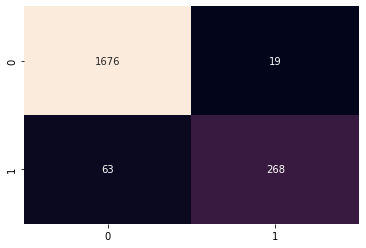

In [ ]:
sns.heatmap(mat, annot=True,fmt= 'd', cbar=False)
xlabels=('predicted')
ylabels=('True')

from my prediction there is a low chance for customer to Churn

HOW THE ORGANISATION CAN REDUCE THEIR CHURN RATE
the credit card company can hold a survey or discussion with already churned customers to know why they left inorder to have an idea on how to avoid future churn.

Continous nuturing of customers should be carried out through the giving of discounts on the use of credit cards at stores,a reduced interest rate and possibly doing a followup on customers after sales.

their should be proper orientation giving to customers inorder to ensure they customers get to know the usefulness of the card and when to put their cards to use.